# Loading Data from CSV file

In [723]:
import pandas as pd
import numpy as np

In [724]:
# Download csv file from resources and put it in working directory
dataframe = pd.read_csv('daily-total-female-births-CA.csv')

#### First five records

In [725]:
dataframe.head()

date  births
0  1959-01-01      35
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44

#### Data Type

In [726]:
dataframe['date'].dtype

dtype('O')

In [727]:
dataframe['date'].value_counts()

1959-01-01    1
1959-09-09    1
1959-09-07    1
1959-09-06    1
1959-09-05    1
             ..
1959-05-01    1
1959-04-30    1
1959-04-29    1
1959-04-28    1
1959-12-31    1
Name: date, Length: 365, dtype: int64

### Loading data with parse_dates

In [728]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', parse_dates=[0])

#### First five records

In [729]:
df2.head()

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

#### Data Type

In [730]:
df2['date'].dtype

dtype('<M8[ns]')

#### Note
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

df = pd.read_csv(.........,parse_dates=[0], date_parser=dateparse)

https://docs.python.org/2/library/datetime.html#strftime-and-strptime-behavior

### Loading Data as a series

In [731]:
series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

/var/folders/cp/zzchzjw14jb8x0ffxgyywy3m0000gp/T/ipykernel_2819/1769618038.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)


#### First 5 records

In [732]:
series.head()

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: births, dtype: int64

# Exploring Time Series Data

#### Size

In [733]:
series.shape

(365,)

In [734]:
df2.shape

(365, 2)

### Querying by time

In [735]:
print(series['1959-01'])

date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: births, dtype: int64


In [736]:
df2[(df2['date'] > '1959-01-01') & (df2['date'] <= '1959-01-21')]

date  births
1  1959-01-02      32
2  1959-01-03      30
3  1959-01-04      31
4  1959-01-05      44
5  1959-01-06      29
6  1959-01-07      45
7  1959-01-08      43
8  1959-01-09      38
9  1959-01-10      27
10 1959-01-11      38
11 1959-01-12      33
12 1959-01-13      55
13 1959-01-14      47
14 1959-01-15      45
15 1959-01-16      37
16 1959-01-17      50
17 1959-01-18      43
18 1959-01-19      41
19 1959-01-20      52
20 1959-01-21      34

### Descriptive Statistics

In [737]:
series.describe()

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: births, dtype: float64

In [738]:
df2.describe()

births
count  365.000000
mean    41.980822
std      7.348257
min     23.000000
25%     37.000000
50%     42.000000
75%     46.000000
max     73.000000

# Feature Engineering

* Date time features
* Lag features
* Window features
* Expanding feature


### Date time features

In [739]:
df2.head(5)

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44

In [740]:
features = df2.copy()

In [741]:
features['year'] = df2['date'].dt.year

In [742]:
features['month'] = df2['date'].dt.month

In [743]:
features['day'] = df2['date'].dt.day

In [744]:
features.head(5)

date  births  year  month  day
0 1959-01-01      35  1959      1    1
1 1959-01-02      32  1959      1    2
2 1959-01-03      30  1959      1    3
3 1959-01-04      31  1959      1    4
4 1959-01-05      44  1959      1    5

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/series.html#datetimelike-properties

### Lag features

To create lag1 feature : we want the birth of the previous period time and the same day last year

In [745]:
features['lag1'] =  df2['births'].shift(1)

In [746]:
features['lag2'] =  df2['births'].shift(365)

In [747]:
features.head(7)

date  births  year  month  day  lag1  lag2
0 1959-01-01      35  1959      1    1   NaN   NaN
1 1959-01-02      32  1959      1    2  35.0   NaN
2 1959-01-03      30  1959      1    3  32.0   NaN
3 1959-01-04      31  1959      1    4  30.0   NaN
4 1959-01-05      44  1959      1    5  31.0   NaN
5 1959-01-06      29  1959      1    6  44.0   NaN
6 1959-01-07      45  1959      1    7  29.0   NaN

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.shift.html#pandas.Series.shift

### Window features

I want the mean/max of the mounth and the previous one  (2 periods)

In [748]:
features['Roll_mean'] = df2['births'].rolling(window = 2).mean()

In [749]:
features.head(5)

date  births  year  month  day  lag1  lag2  Roll_mean
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5

In [750]:
features['Roll_max'] = df2['births'].rolling(window = 3).max()

In [751]:
features.head(5)

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5       NaN
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0      35.0
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5      32.0
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5      44.0

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.rolling.html#pandas.Series.rolling

### Expanding features

we want to consider the maximum of births till a specific year or till now, so we have to consider all of the births above.

In [752]:
features['Expand_max'] = df2['births'].expanding().max() 

In [753]:
features.head(10)

date  births  year  month  day  lag1  lag2  Roll_mean  Roll_max  \
0 1959-01-01      35  1959      1    1   NaN   NaN        NaN       NaN   
1 1959-01-02      32  1959      1    2  35.0   NaN       33.5       NaN   
2 1959-01-03      30  1959      1    3  32.0   NaN       31.0      35.0   
3 1959-01-04      31  1959      1    4  30.0   NaN       30.5      32.0   
4 1959-01-05      44  1959      1    5  31.0   NaN       37.5      44.0   
5 1959-01-06      29  1959      1    6  44.0   NaN       36.5      44.0   
6 1959-01-07      45  1959      1    7  29.0   NaN       37.0      45.0   
7 1959-01-08      43  1959      1    8  45.0   NaN       44.0      45.0   
8 1959-01-09      38  1959      1    9  43.0   NaN       40.5      45.0   
9 1959-01-10      27  1959      1   10  38.0   NaN       32.5      43.0   

   Expand_max  
0        35.0  
1        35.0  
2        35.0  
3        35.0  
4        44.0  
5        44.0  
6        45.0  
7        45.0  
8        45.0  
9        45.0

For more detail : https://pandas.pydata.org/pandas-docs/stable//reference/api/pandas.Series.expanding.html#pandas.Series.expanding

# Time Series - Data Visualization

In [754]:
from matplotlib import pyplot as plt
%matplotlib inline

In [755]:
Dataviz_df = df2.copy()

In [756]:
Dataviz_df.head(10)

date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44
5 1959-01-06      29
6 1959-01-07      45
7 1959-01-08      43
8 1959-01-09      38
9 1959-01-10      27

<AxesSubplot:>

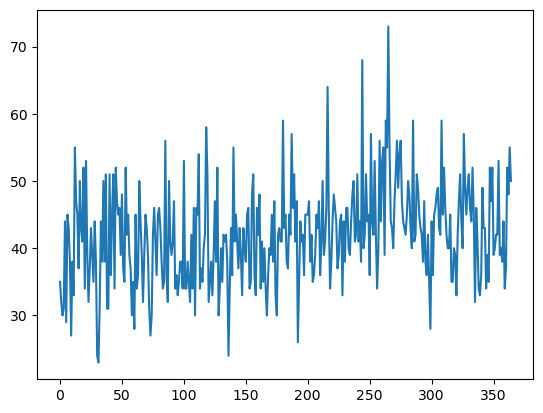

In [757]:
Dataviz_df['births'].plot()

In [758]:
Dataviz_df.index = Dataviz_df['date'] 

<AxesSubplot:xlabel='date'>

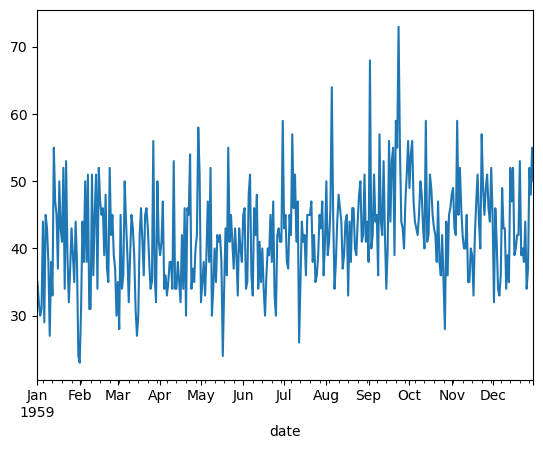

In [759]:
Dataviz_df['births'].plot()

### Zooming In

In [760]:
Dataviz_df2 = Dataviz_df[(Dataviz_df['date'] > '1959-01-01') & (Dataviz_df['date'] <= '1959-01-10')].copy()

In [761]:
Dataviz_df2

date  births
date                         
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44
1959-01-06 1959-01-06      29
1959-01-07 1959-01-07      45
1959-01-08 1959-01-08      43
1959-01-09 1959-01-09      38
1959-01-10 1959-01-10      27

<AxesSubplot:xlabel='date'>

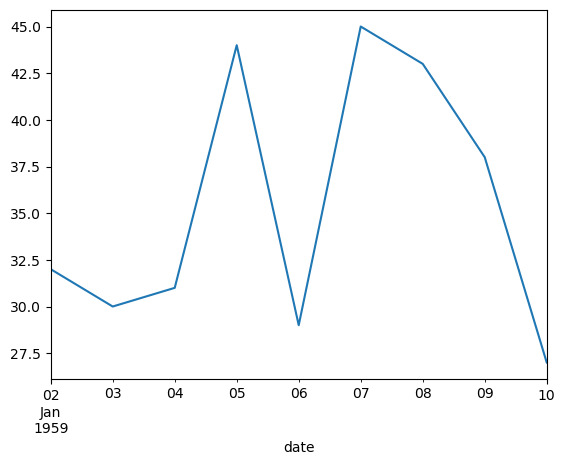

In [762]:
Dataviz_df2['births'].plot()

### Trendline

In [763]:
import seaborn as sns

#we should have numerical data to work with regplot

<AxesSubplot:ylabel='births'>

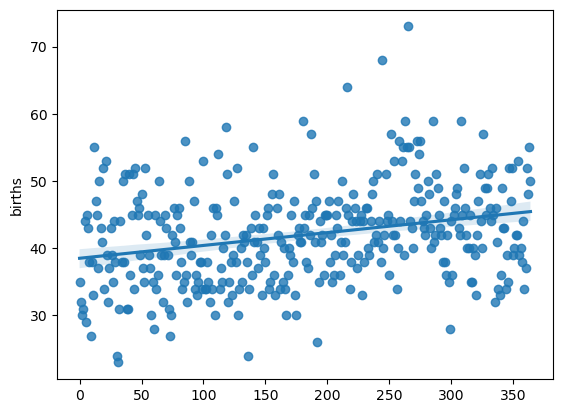

In [764]:
sns.regplot(x= df2.index.values, y=df2['births'])

<AxesSubplot:ylabel='births'>

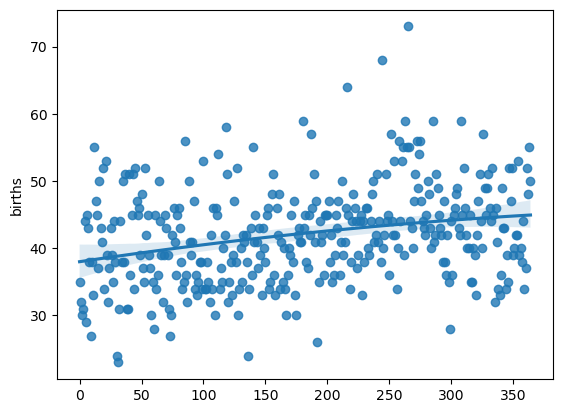

In [765]:
sns.regplot(x= df2.index.values, y=df2['births'], order =2)

In [766]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [767]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

<AxesSubplot:>

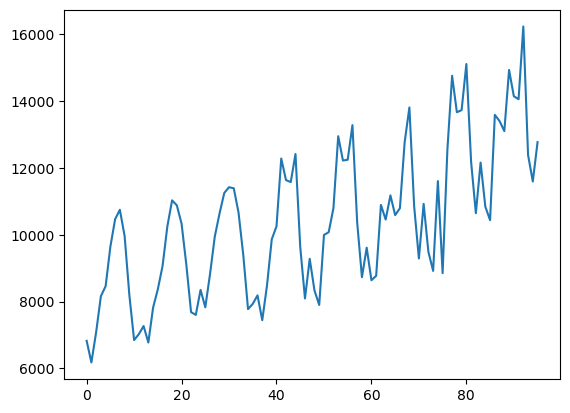

In [768]:
miles_df['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

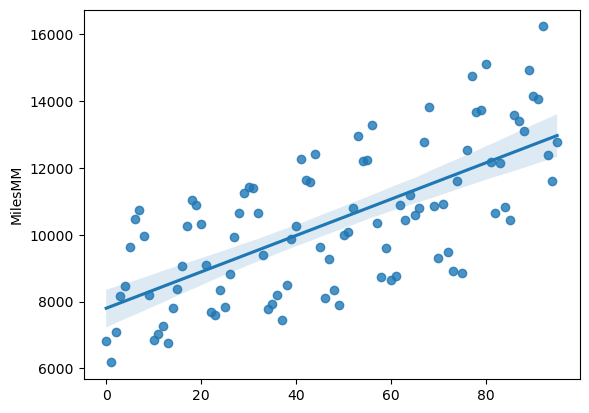

In [769]:
sns.regplot(x= miles_df.index.values, y=miles_df['MilesMM'])

### Removing Seasonality

In [770]:
miles_df['year'] = miles_df['Month'].dt.year

In [771]:
miles_df.head()

Month  MilesMM  year
0 1963-01-01     6827  1963
1 1963-02-01     6178  1963
2 1963-03-01     7084  1963
3 1963-04-01     8162  1963
4 1963-05-01     8462  1963

In [772]:
miles_df.groupby('year')['MilesMM'].mean()

year
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='year'>

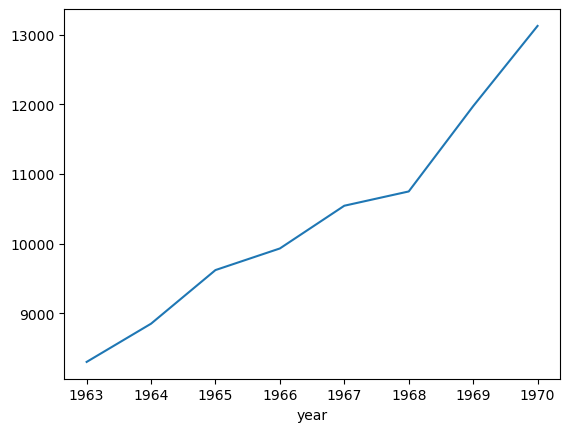

In [773]:
miles_df.groupby('year')['MilesMM'].mean().plot()

### Creating Lag plots

In [774]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [775]:
miles_df.head()

Month  MilesMM  year    lag1
0 1963-01-01     6827  1963     NaN
1 1963-02-01     6178  1963  6827.0
2 1963-03-01     7084  1963  6178.0
3 1963-04-01     8162  1963  7084.0
4 1963-05-01     8462  1963  8162.0

<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

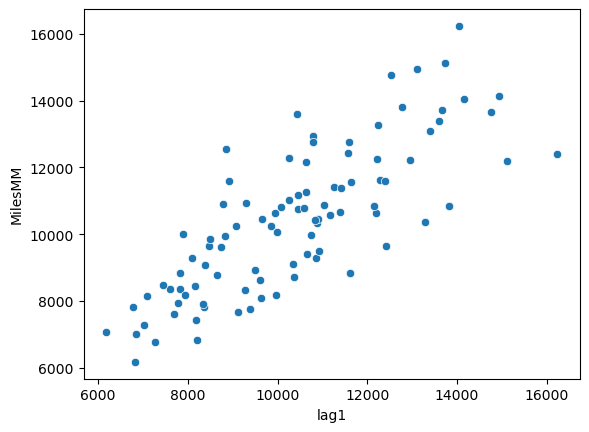

In [776]:
sns.scatterplot(x=miles_df['lag1'], y=miles_df['MilesMM'])

In [777]:
#that means there's a positive correlation between lag1 & MileMM

In [778]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

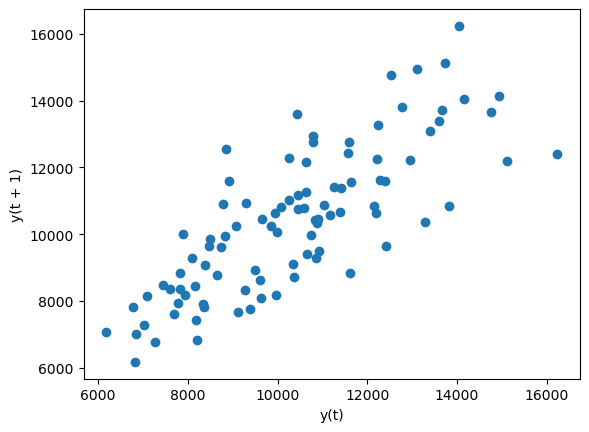

In [779]:
lag_plot(miles_df['MilesMM'])

In [780]:
# It's so important to visualise the correlation between the lags variables

### Autocorrelation Plots

In [781]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

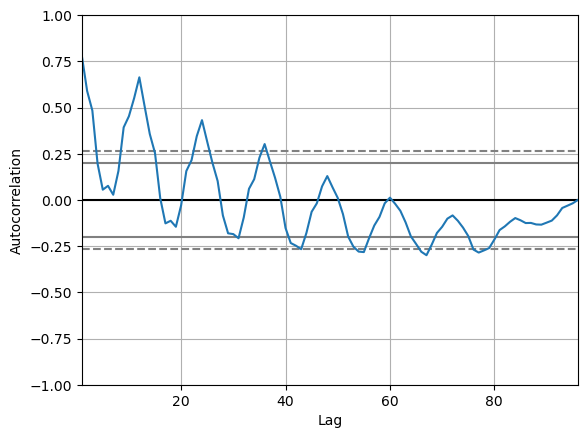

In [782]:
autocorrelation_plot(miles_df['MilesMM'])

In [783]:
#we visualise the relation between each MilesMM and it's lag variable

## Downsampling and Upsampling

Downsampling means transforming our data from higher frequency data to some lower frequency data(mounthly to yearly, daily to weekly , weekly to mounthly)

In [784]:

miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [785]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

### Downsampling

#from monthly data to quarterly data

In [786]:
quarterly_miles_df = miles_df.resample('Q', on='Month').mean()

In [787]:
quarterly_miles_df.head()

MilesMM
Month                   
1963-03-31   6696.333333
1963-06-30   8756.000000
1963-09-30  10392.333333
1963-12-31   7356.333333
1964-03-31   7287.666667

#to annual data

In [788]:
yearly_total_miles_df = miles_df.resample('A', on='Month').sum()

In [789]:
yearly_total_miles_df.head()

MilesMM
Month              
1963-12-31    99603
1964-12-31   106192
1965-12-31   115431
1966-12-31   119154
1967-12-31   126515

| Alias  | Description           |
|--------|-----------------------|
| B      | Business day          |
| D      | Calendar day          |
| W      | Weekly                |
| M      | Month end             |
| Q      | Quarter end           |
| A      | Year end              |
| BA     | Business year end     |
| AS     | Year start            |
| H      | Hourly frequency      |
| T, min | Minutely frequency    |
| S      | Secondly frequency    |
| L, ms  | Millisecond frequency |
| U, us  | Microsecond frequency |
| N, ns  | Nanosecond frequency  |

### Upsampling

#Monthly to daily


In [790]:
upsampled_miles_df = miles_df.resample('D', on='Month').mean()

In [791]:
upsampled_miles_df.head(35)

MilesMM
Month              
1963-01-01   6827.0
1963-01-02      NaN
1963-01-03      NaN
1963-01-04      NaN
1963-01-05      NaN
1963-01-06      NaN
1963-01-07      NaN
1963-01-08      NaN
1963-01-09      NaN
1963-01-10      NaN
1963-01-11      NaN
1963-01-12      NaN
1963-01-13      NaN
1963-01-14      NaN
1963-01-15      NaN
1963-01-16      NaN
1963-01-17      NaN
1963-01-18      NaN
1963-01-19      NaN
1963-01-20      NaN
1963-01-21      NaN
1963-01-22      NaN
1963-01-23      NaN
1963-01-24      NaN
1963-01-25      NaN
1963-01-26      NaN
1963-01-27      NaN
1963-01-28      NaN
1963-01-29      NaN
1963-01-30      NaN
1963-01-31      NaN
1963-02-01   6178.0
1963-02-02      NaN
1963-02-03      NaN
1963-02-04      NaN

In [792]:
interpolated_miles_df = upsampled_miles_df.interpolate(method='linear')

In [793]:
interpolated_miles_df.head(32)

MilesMM
Month                  
1963-01-01  6827.000000
1963-01-02  6806.064516
1963-01-03  6785.129032
1963-01-04  6764.193548
1963-01-05  6743.258065
1963-01-06  6722.322581
1963-01-07  6701.387097
1963-01-08  6680.451613
1963-01-09  6659.516129
1963-01-10  6638.580645
1963-01-11  6617.645161
1963-01-12  6596.709677
1963-01-13  6575.774194
1963-01-14  6554.838710
1963-01-15  6533.903226
1963-01-16  6512.967742
1963-01-17  6492.032258
1963-01-18  6471.096774
1963-01-19  6450.161290
1963-01-20  6429.225806
1963-01-21  6408.290323
1963-01-22  6387.354839
1963-01-23  6366.419355
1963-01-24  6345.483871
1963-01-25  6324.548387
1963-01-26  6303.612903
1963-01-27  6282.677419
1963-01-28  6261.741935
1963-01-29  6240.806452
1963-01-30  6219.870968
1963-01-31  6198.935484
1963-02-01  6178.000000

<AxesSubplot:xlabel='Month'>

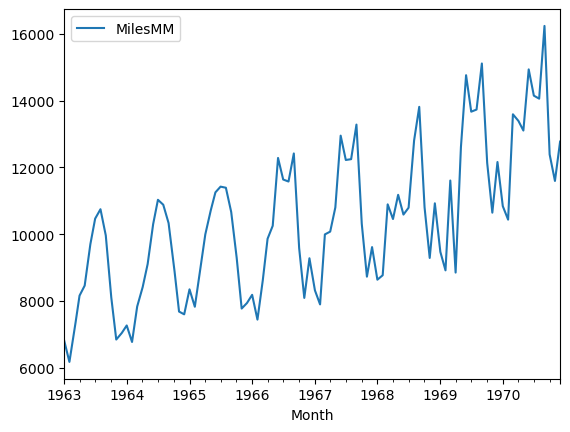

In [794]:
interpolated_miles_df.plot()

In [795]:
poly_interpolated_miles_df = upsampled_miles_df.interpolate(method='spline', order=2)

In [796]:
poly_interpolated_miles_df.head(35)

MilesMM
Month                  
1963-01-01  6827.000000
1963-01-02  6775.328886
1963-01-03  6725.739829
1963-01-04  6678.197709
1963-01-05  6632.702526
1963-01-06  6589.254280
1963-01-07  6547.852971
1963-01-08  6508.498600
1963-01-09  6471.191166
1963-01-10  6435.930669
1963-01-11  6402.717110
1963-01-12  6371.550488
1963-01-13  6342.430803
1963-01-14  6315.358055
1963-01-15  6290.332244
1963-01-16  6267.353371
1963-01-17  6246.421435
1963-01-18  6227.536436
1963-01-19  6210.698374
1963-01-20  6195.907250
1963-01-21  6183.163063
1963-01-22  6172.465813
1963-01-23  6163.815500
1963-01-24  6157.212125
1963-01-25  6152.655687
1963-01-26  6150.146186
1963-01-27  6149.683622
1963-01-28  6151.267995
1963-01-29  6154.899306
1963-01-30  6160.577554
1963-01-31  6168.302739
1963-02-01  6178.000000
1963-02-02  6189.893921
1963-02-03  6203.759918
1963-02-04  6219.672853

<AxesSubplot:xlabel='Month'>

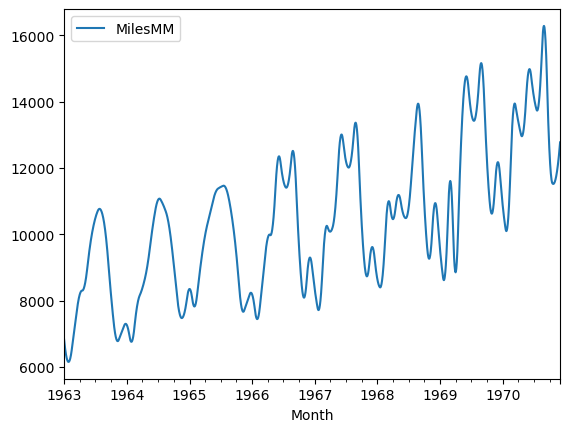

In [797]:
poly_interpolated_miles_df.plot()

| Method  | Description                                               |
|---------|-----------------------------------------------------------|
| bfill   | Backward fill                                             |
| count   | Count of values                                           |
| ffill   | Forward fill                                              |
| first   | First valid data value                                    |
| last    | Last valid data value                                     |
| max     | Maximum data value                                        |
| mean    | Mean of values in time range                              |
| median  | Median of values in time range                            |
| min     | Minimum data value                                        |
| nunique | Number of unique values                                   |
| ohlc    | Opening value, highest value, lowest value, closing value |
| pad     | Same as forward fill                                      |
| std     | Standard deviation of values                              |
| sum     | Sum of values                                             |
| var     | Variance of values                                        |

## Decomposing Time Series

**Additive Model** 

y(t) = Level + Trend + Seasonality + Noise

**Multiplicative Model** 

y(t) = Level * Trend * Seasonality * Noise

In [798]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [799]:
miles_decomp_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [800]:
miles_decomp_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [801]:
miles_decomp_df.index = miles_decomp_df['Month'] 

In [802]:
result = seasonal_decompose(miles_decomp_df['MilesMM'], model='additive')

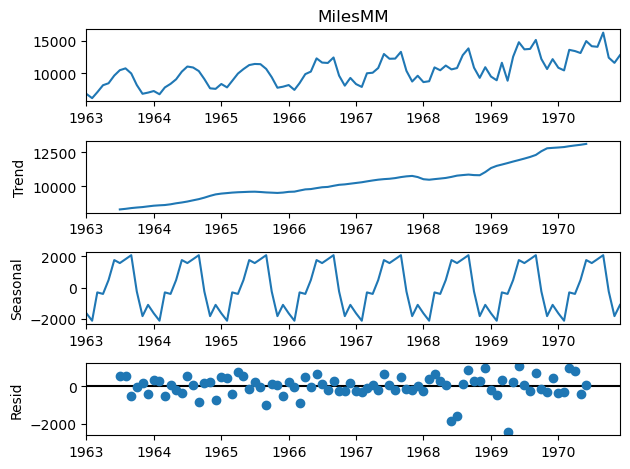

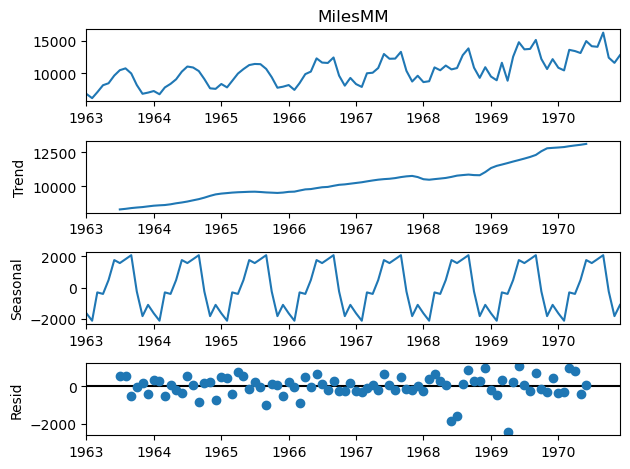

In [803]:
result.plot()

In [804]:
result2 = seasonal_decompose(miles_decomp_df['MilesMM'], model='multiplicative')

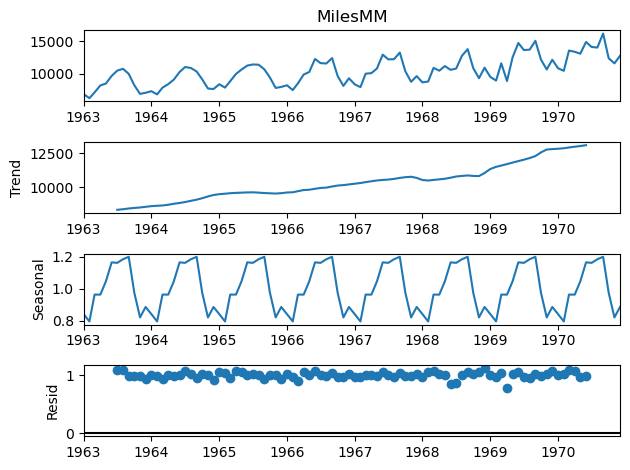

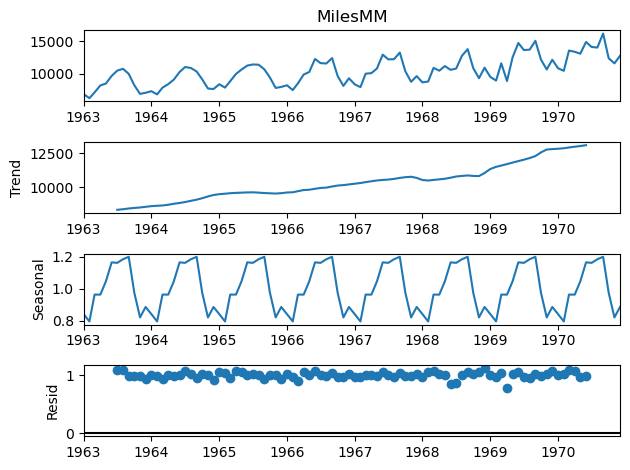

In [805]:
result2.plot()

### Differencing : # to remove trends and seasonality

In [806]:
miles_df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [807]:
miles_df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [808]:
miles_df['lag1'] =  miles_df['MilesMM'].shift(1)

In [809]:
#To remove trend,we do the difference between MilesMM and it's lag1

In [810]:
miles_df['MilesMM_diff_1'] = miles_df['MilesMM'].diff(periods=1)

In [811]:
miles_df.head()

Month  MilesMM    lag1  MilesMM_diff_1
0 1963-01-01     6827     NaN             NaN
1 1963-02-01     6178  6827.0          -649.0
2 1963-03-01     7084  6178.0           906.0
3 1963-04-01     8162  7084.0          1078.0
4 1963-05-01     8462  8162.0           300.0

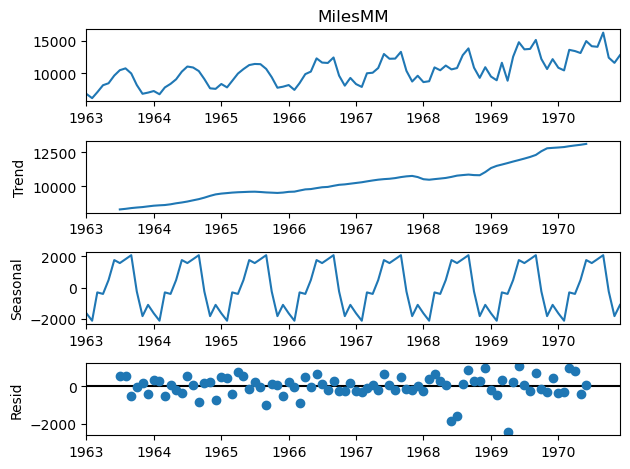

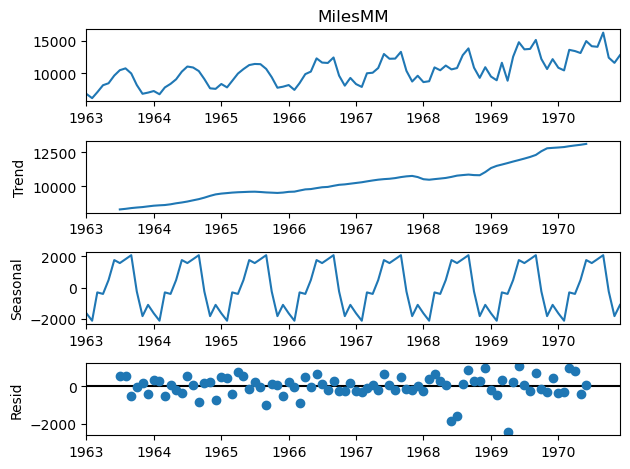

In [812]:
miles_df.index = miles_df['Month'] 
result_a = seasonal_decompose(miles_df['MilesMM'], model='additive')
result_a.plot()

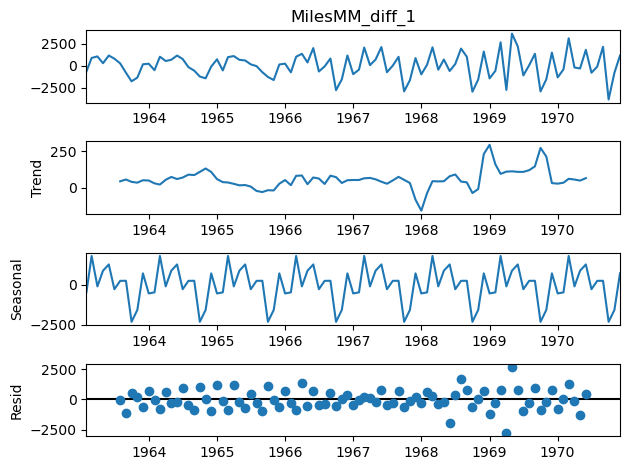

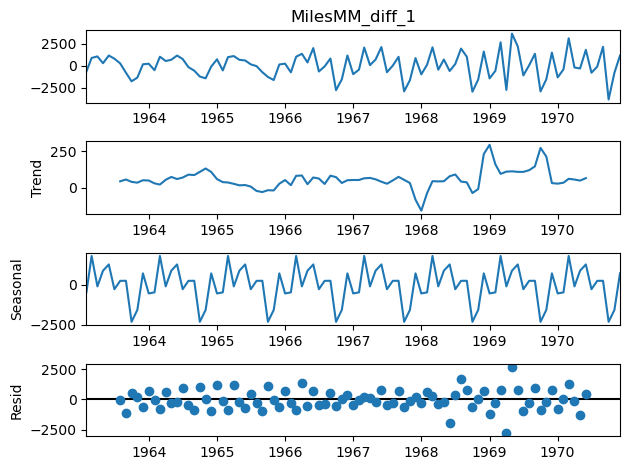

In [813]:
miles_df.index = miles_df['Month'] 
result_b = seasonal_decompose(miles_df.iloc[1:,3], model='additive')
result_b.plot()

In [814]:
#we have successfully removef our trend, trend now is no longer linear, but we still have seasonality .


In [815]:
#Let's remove seasonality

<AxesSubplot:xlabel='Month'>

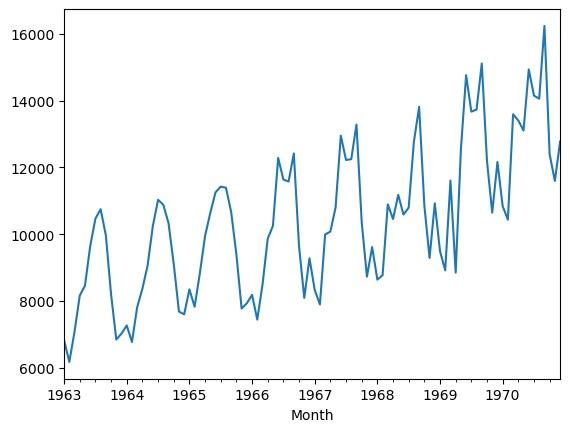

In [816]:
miles_df['MilesMM'].plot()

<AxesSubplot:xlabel='Month'>

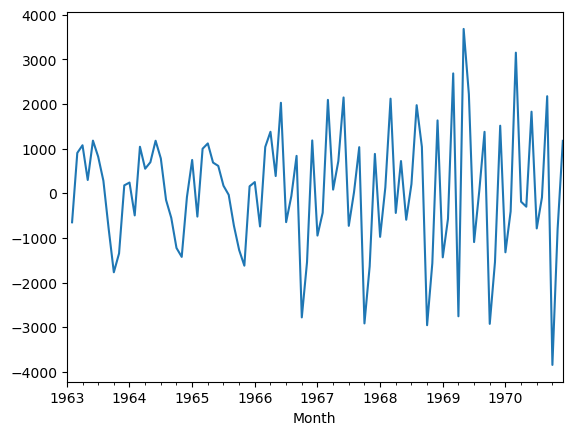

In [817]:
miles_df['MilesMM_diff_1'].plot() 

In [818]:
# we can clearly detect that there's a Seasonality in the first 3 raws since we can visalize a pattern


In [819]:
miles_df['MilesMM_diff_12'] = miles_df['MilesMM_diff_1'].diff(periods=12)

<AxesSubplot:xlabel='Month'>

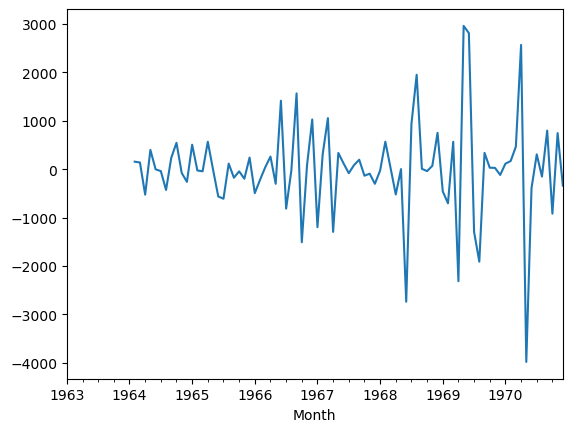

In [820]:

miles_df['MilesMM_diff_12'].plot() 

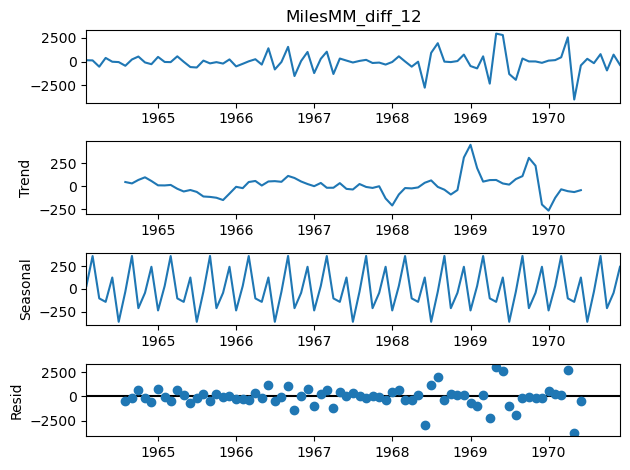

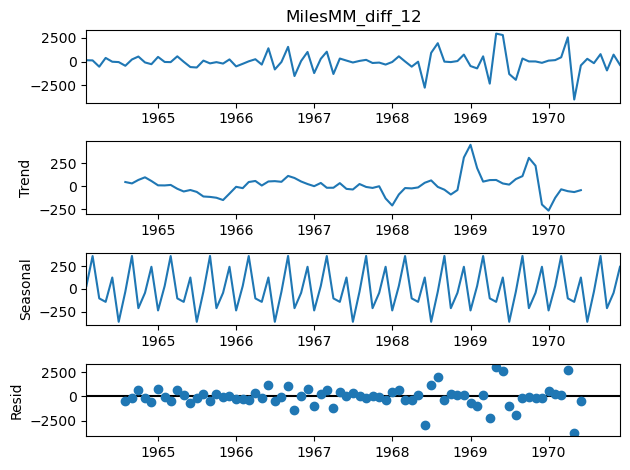

In [821]:
result_c = seasonal_decompose(miles_df.iloc[13:,4], model='additive')
result_c.plot()

In [822]:
miles_df.head(50)

Month  MilesMM     lag1  MilesMM_diff_1  MilesMM_diff_12
Month                                                                   
1963-01-01 1963-01-01     6827      NaN             NaN              NaN
1963-02-01 1963-02-01     6178   6827.0          -649.0              NaN
1963-03-01 1963-03-01     7084   6178.0           906.0              NaN
1963-04-01 1963-04-01     8162   7084.0          1078.0              NaN
1963-05-01 1963-05-01     8462   8162.0           300.0              NaN
1963-06-01 1963-06-01     9644   8462.0          1182.0              NaN
1963-07-01 1963-07-01    10466   9644.0           822.0              NaN
1963-08-01 1963-08-01    10748  10466.0           282.0              NaN
1963-09-01 1963-09-01     9963  10748.0          -785.0              NaN
1963-10-01 1963-10-01     8194   9963.0         -1769.0              NaN
1963-11-01 1963-11-01     6848   8194.0         -1346.0              NaN
1963-12-01 1963-12-01     7027   6848.0           179.0              NaN
1964-01-01 1964-01-01     7269   7027.0           242.0              NaN
1964-02-01 1964-02-01     6775   7269.0          -494.0            155.0
1964-03-01 1964-03-01     7819   6775.0          1044.0            138.0
1964-04-01 1964-04-01     8371   7819.0           552.0           -526.0
1964-05-01 1964-05-01     9069   8371.0           698.0            398.0
1964-06-01 1964-06-01    10248   9069.0          1179.0             -3.0
1964-07-01 1964-07-01    11030  10248.0           782.0            -40.0
1964-08-01 1964-08-01    10882  11030.0          -148.0           -430.0
1964-09-01 1964-09-01    10333  10882.0          -549.0            236.0
1964-10-01 1964-10-01     9109  10333.0         -1224.0            545.0
1964-11-01 1964-11-01     7685   9109.0         -1424.0            -78.0
1964-12-01 1964-12-01     7602   7685.0           -83.0           -262.0
1965-01-01 1965-01-01     8350   7602.0           748.0            506.0
1965-02-01 1965-02-01     7829   8350.0          -521.0            -27.0
1965-03-01 1965-03-01     8829   7829.0          1000.0            -44.0
1965-04-01 1965-04-01     9948   8829.0          1119.0            567.0
1965-05-01 1965-05-01    10638   9948.0           690.0             -8.0
1965-06-01 1965-06-01    11253  10638.0           615.0           -564.0
1965-07-01 1965-07-01    11424  11253.0           171.0           -611.0
1965-08-01 1965-08-01    11391  11424.0           -33.0            115.0
1965-09-01 1965-09-01    10665  11391.0          -726.0           -177.0
1965-10-01 1965-10-01     9396  10665.0         -1269.0            -45.0
1965-11-01 1965-11-01     7775   9396.0         -1621.0           -197.0
1965-12-01 1965-12-01     7933   7775.0           158.0            241.0
1966-01-01 1966-01-01     8186   7933.0           253.0           -495.0
1966-02-01 1966-02-01     7444   8186.0          -742.0           -221.0
1966-03-01 1966-03-01     8484   7444.0          1040.0             40.0
1966-04-01 1966-04-01     9864   8484.0          1380.0            261.0
1966-05-01 1966-05-01    10252   9864.0           388.0           -302.0
1966-06-01 1966-06-01    12282  10252.0          2030.0           1415.0
1966-07-01 1966-07-01    11637  12282.0          -645.0           -816.0
1966-08-01 1966-08-01    11577  11637.0           -60.0            -27.0
1966-09-01 1966-09-01    12417  11577.0           840.0           1566.0
1966-10-01 1966-10-01     9637  12417.0         -2780.0          -1511.0
1966-11-01 1966-11-01     8094   9637.0         -1543.0             78.0
1966-12-01 1966-12-01     9280   8094.0          1186.0           1028.0
1967-01-01 1967-01-01     8334   9280.0          -946.0          -1199.0
1967-02-01 1967-02-01     7899   8334.0          -435.0            307.0

## Test-Train Split

In [823]:
temp_df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [824]:
temp_df.head()

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

In [825]:
temp_df.tail()

Date  Temp
3645 1990-12-27  14.0
3646 1990-12-28  13.6
3647 1990-12-29  13.5
3648 1990-12-30  15.7
3649 1990-12-31  13.0

In [826]:
temp_df.shape

(3650, 2)

In [827]:
temp_df.shape[0] # nb of raws

3650

In [828]:
train_size = int(temp_df.shape[0]*0.8)
train_size

2920

In [829]:
train =  temp_df[0:train_size]

In [830]:
test =  temp_df[train_size:]

In [831]:
train.shape

(2920, 2)

In [832]:
test.shape

(730, 2)

### Walk Forward Validation

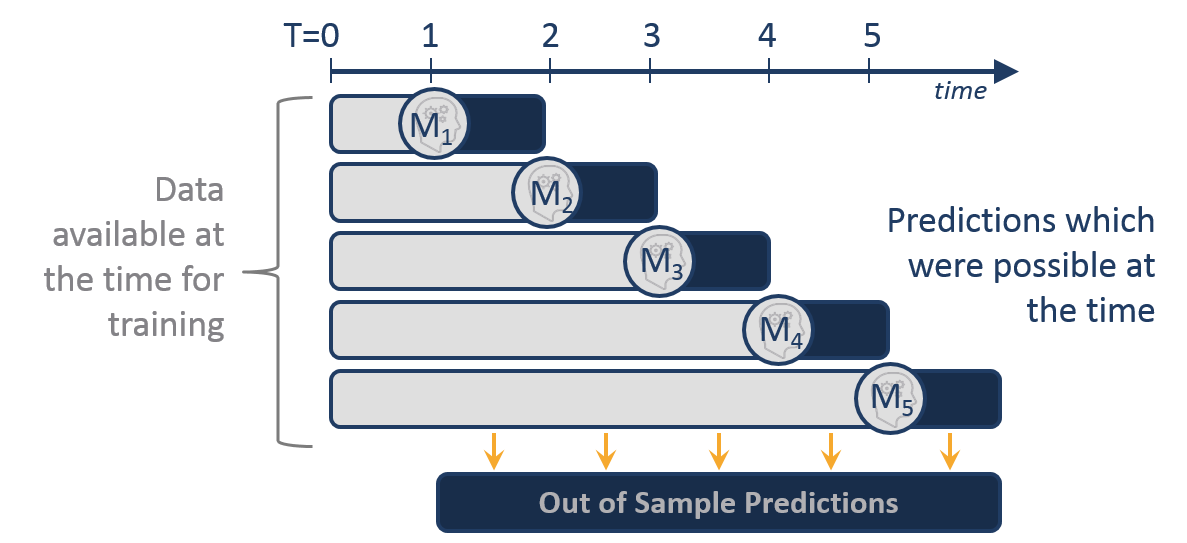

### Persistence Model / Naive model

In [833]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [834]:
df.head()

Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8

In [835]:
df['t'] =  df['Temp'].shift(1)

In [836]:
df.head()

Date  Temp     t
0 1981-01-01  20.7   NaN
1 1981-01-02  17.9  20.7
2 1981-01-03  18.8  17.9
3 1981-01-04  14.6  18.8
4 1981-01-05  15.8  14.6

In [837]:
train, test = df[1:df.shape[0]-7], df[df.shape[0]-7:] #from index1, cause 0 is NaN


In [838]:
train.head()

Date  Temp     t
1 1981-01-02  17.9  20.7
2 1981-01-03  18.8  17.9
3 1981-01-04  14.6  18.8
4 1981-01-05  15.8  14.6
5 1981-01-06  15.8  15.8

In [839]:
train_X, train_y = train['t'], train['Temp']
test_X, test_y = test['t'], test['Temp']

#### # walk-forward validation

In [840]:
predictions = test_X.copy()

In [841]:
print(predictions)
print(test_y)

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64
3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64


In [842]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

3.4228571428571413

In [843]:
#from mse we can know if our data is a random walk or not.

In [844]:
#this mse value for naive forecast is important because we'll evaluate our advanced models using this value, if it's giving us a mse value> the old one , we can say that our model is not able to extract any information from the data , and we can consider Time series data as a random walk


In [845]:
from matplotlib import pyplot

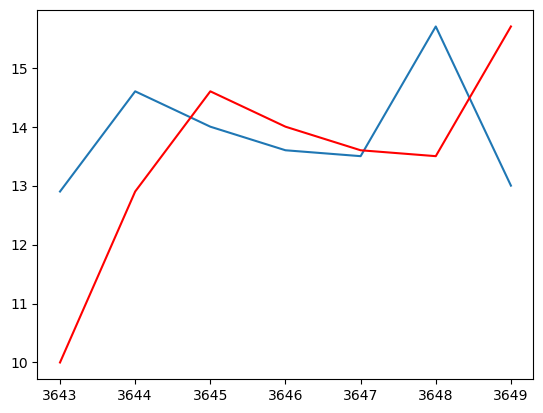

In [846]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Autoregression Model

In [847]:
# This method should be applied to time series without trends or seasonality


In [848]:
#Auto regression uses the lag values to train the model , it should find the Bo and B1 of the equation


In [849]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [850]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [851]:
train.head()

1    17.9
2    18.8
3    14.6
4    15.8
5    15.8
Name: Temp, dtype: float64

In [852]:
from statsmodels.tsa.ar_model import AutoReg


In [853]:
len(train)

3642

In [854]:
model = AutoReg(train , lags= 29)

model_fit = model.fit()

#### Coef of lag variables

In [855]:
model_fit.params

const       0.557544
Temp.L1     0.588595
Temp.L2    -0.090826
Temp.L3     0.048262
Temp.L4     0.040065
Temp.L5     0.039302
Temp.L6     0.025946
Temp.L7     0.044668
Temp.L8     0.012768
Temp.L9     0.037436
Temp.L10   -0.000812
Temp.L11    0.004791
Temp.L12    0.018473
Temp.L13    0.026891
Temp.L14    0.000576
Temp.L15    0.024810
Temp.L16    0.007403
Temp.L17    0.009916
Temp.L18    0.034160
Temp.L19   -0.009120
Temp.L20    0.024213
Temp.L21    0.018787
Temp.L22    0.012184
Temp.L23   -0.018553
Temp.L24   -0.001772
Temp.L25    0.016732
Temp.L26    0.019762
Temp.L27    0.009832
Temp.L28    0.006227
Temp.L29   -0.001377
dtype: float64

In [856]:
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1,  dynamic=False
                               )

In [857]:
predictions

3643    13.053794
3644    13.532591
3645    13.243126
3646    13.091438
3647    13.146989
3648    13.176153
3649          NaN
dtype: float64

In [858]:
predictions.iloc[0]

13.053794217229793

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions
                        )
mse

In [859]:
# we've got an mse of 1.5 , so our error is decreasing from 3.4 to 1.5. so our time series is not a rando√π walk

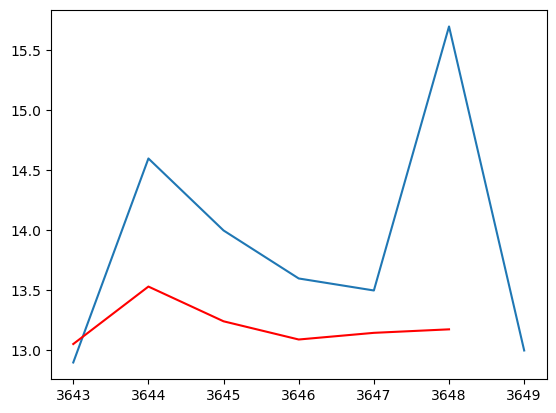

In [860]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

### Walk Forward

In [861]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [862]:
train, test = df.Temp[1:df.shape[0]-7], df.Temp[df.shape[0]-7:]

In [863]:
data = train
predict =[]
for t in test:
    model = AutoReg(data, lags = 29)
    model_fit = model.fit()
    y = model_fit.predict(start=len(data), end=len(train)+len(test)-1)
    print(y.values[0])
    predict.append(y.values[0])
    data = np.append(data, t)
    data = pd.Series(data)
    

13.053794217229793
13.660699943835189
14.353164144090155
13.43012079162701
13.37475647718511
13.479111299420511
14.767773018439874


In [864]:
predict

[13.053794217229793,
 13.660699943835189,
 14.353164144090155,
 13.43012079162701,
 13.37475647718511,
 13.479111299420511,
 14.767773018439874]

In [865]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

1.304653588566523

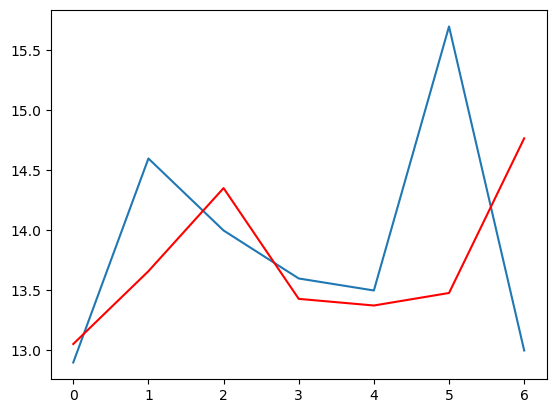

In [866]:
pyplot.plot(test.values)
pyplot.plot(predict, color='red')

### Moving Average Model

In [867]:
# We have to use a model to create forecasted values, and then you need to create residual values on those forecasted values .


In [868]:
df = pd.read_csv('daily-min-temperatures.csv', header=0 , parse_dates=[0])

In [869]:
df['t'] =  df['Temp'].shift(1)

In [870]:
df['Resid'] = df['Temp'] - df['t']

In [871]:
df.head()

Date  Temp     t  Resid
0 1981-01-01  20.7   NaN    NaN
1 1981-01-02  17.9  20.7   -2.8
2 1981-01-03  18.8  17.9    0.9
3 1981-01-04  14.6  18.8   -4.2
4 1981-01-05  15.8  14.6    1.2

In [872]:
#We have implemented naive forecast model 

In [873]:
train, test = df.Resid[1:df.shape[0]-7], df.Resid[df.shape[0]-7:]

In [874]:
train.head()

1   -2.8
2    0.9
3   -4.2
4    1.2
5    0.0
Name: Resid, dtype: float64

In [875]:
model = AutoReg(train, lags =29)
model_fit = model.fit()

In [876]:
model_fit.params

const       -0.006415
Resid.L1    -0.407139
Resid.L2    -0.496194
Resid.L3    -0.445747
Resid.L4    -0.403706
Resid.L5    -0.362528
Resid.L6    -0.334810
Resid.L7    -0.288468
Resid.L8    -0.274281
Resid.L9    -0.235333
Resid.L10   -0.234799
Resid.L11   -0.228532
Resid.L12   -0.208608
Resid.L13   -0.180324
Resid.L14   -0.178425
Resid.L15   -0.152265
Resid.L16   -0.143617
Resid.L17   -0.132501
Resid.L18   -0.097075
Resid.L19   -0.104927
Resid.L20   -0.079371
Resid.L21   -0.059348
Resid.L22   -0.045921
Resid.L23   -0.063197
Resid.L24   -0.063441
Resid.L25   -0.045061
Resid.L26   -0.023578
Resid.L27   -0.011882
Resid.L28   -0.003789
Resid.L29   -0.003422
dtype: float64

In [877]:
pred_resid = model_fit.predict(start=len(train), end=len(train)+len(test)-1)


In [878]:
pred_resid

3643    1.264192
3644    0.510869
3645   -0.251687
3646   -0.122054
3647    0.077509
3648    0.055600
3649         NaN
dtype: float64

In [879]:
df.t[df.shape[0]-7:]

3643    10.0
3644    12.9
3645    14.6
3646    14.0
3647    13.6
3648    13.5
3649    15.7
Name: t, dtype: float64

In [880]:
predictions = df.t[df.shape[0]-7:] + pred_resid

In [881]:
predictions

3643    11.264192
3644    13.410869
3645    14.348313
3646    13.877946
3647    13.677509
3648    13.555600
3649          NaN
dtype: float64

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, predictions)
mse

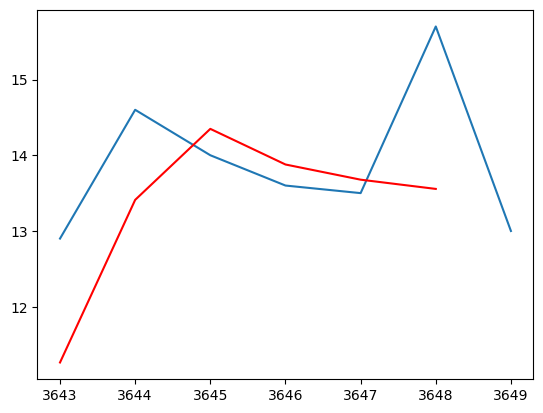

In [882]:
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')

In [883]:
#ACF: 
#In Time Series, Auto-correlation consist on finding the correlation of the variabke
# with its own lag values , lag1, lag2, lag3 and then plot all the AC values : Correlation 
#function plot: ACF plot

In [884]:
#PACF: find out lagged values of the residuals for moving average
# Remove the effect of previous lags to do a new AC 
#PACF Plot gives the number of lags we should use in AR

## SARIMAX Model

In [885]:
# iNTEGRATED: because uses the method of differencing

In [886]:
#ARMA can only work with series without trend and seasonality

In [887]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [888]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

<AxesSubplot:>

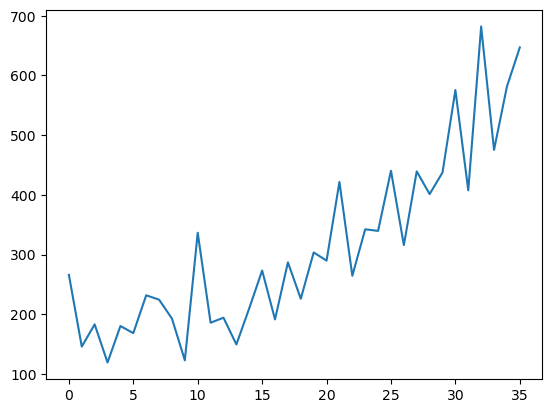

In [889]:
df['Sales'].plot()

In [890]:
# There's no seasonality and there's some sort of quadratic trend,so we need 2 differencing to make it stationnary

Trend is Polynomial.  
D =2

### Autocorrelation Plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

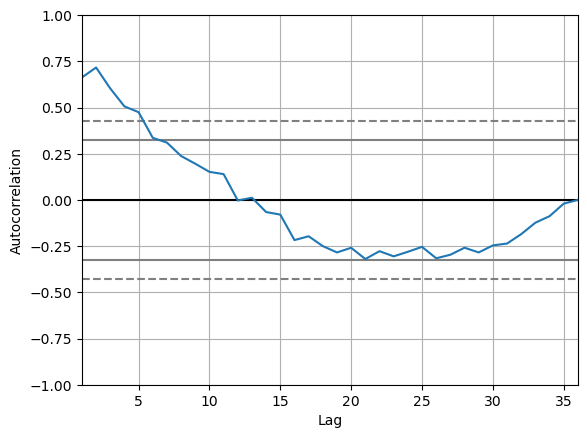

In [891]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])

In [892]:
# we should view the value after which, the line is crossing the confidence interval

 q = 5 

### Partial Autocorrelation Graph

In [893]:
from statsmodels.graphics.tsaplots import plot_pacf

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


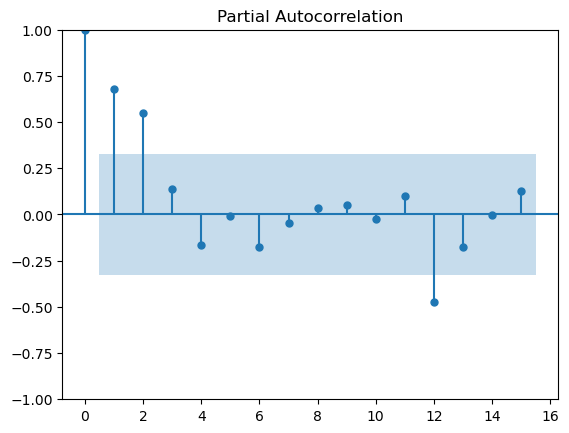

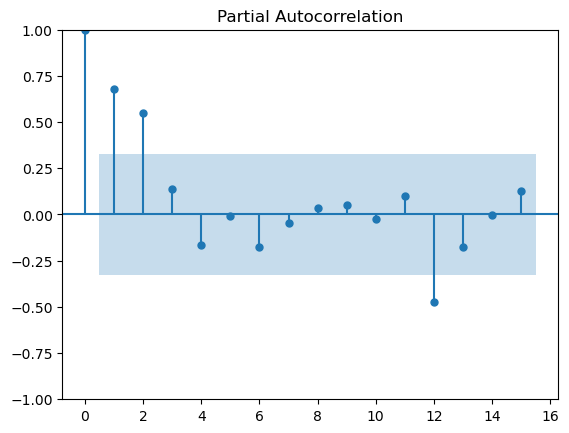

In [894]:
plot_pacf(df['Sales'], lags=15)

p = 2

In [895]:
from statsmodels.tsa.arima_model import ARIMA

In [896]:
# If we're using only T and T minud one values to forecast P plus one values,
#thzn P =2 / P: order of AR, if we use only T value , then P=1

In [897]:
# D: Order of Integration : Nb of differencing needed , tell our model how many times
# differencing have to be done to remove trend ; if we're seing a quadratic trend, we may do differencing twice ;D =2/
#Linear trends , D = 1

In [898]:
#Q: Order of Moving Average : the window size of residuals that we'll be considering 
# to forecast future residuals == last residuals we using , if last 2 then =2

In [899]:
#P,D,Q

In [917]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(df['Sales'], order=(2,2,5))

In [918]:
model_fit = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.00074D+00    |proj g|=  1.20602D+00

At iterate    5    f=  5.32142D+00    |proj g|=  4.38311D-02

At iterate   10    f=  5.29337D+00    |proj g|=  5.20681D-03

At iterate   15    f=  5.28800D+00    |proj g|=  2.20505D-02

At iterate   20    f=  5.28109D+00    |proj g|=  1.35398D-02

At iterate   25    f=  5.26947D+00    |proj g|=  1.41725D-02

At iterate   30    f=  5.26783D+00    |proj g|=  3.50411D-03

At iterate   35    f=  5.26763D+00    |proj g|=  5.81160D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


In [919]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:               SARIMAX(2, 2, 5)   Log Likelihood                -189.635
Date:                Sun, 12 Feb 2023   AIC                            395.269
Time:                        00:30:40   BIC                            407.480
Sample:                             0   HQIC                           399.434
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9079      0.246     -7.742      0.000      -2.391      -1.425
ar.L2         -0.9545      0.219     -4.363      0.000      -1.383      -0.526
ma.L1         -0.0681     19.857     -0.003      0.997     -38.988      38.851
ma.L2         -1.8461      2.774     -0.665      0.506      -7.284       3.592
ma.L3          0.3024     19.803      0.015      0.988     -38.512      39.117
ma.L4          0.9883      2.806      0.352      0.725      -4.512       6.489
ma.L5         -0.1280      0.339     -0.377      0.706      -0.793       0.537
sigma2      2696.5697      0.014   1.95e+05      0.000    2696.543    2696.597
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 0.18
Prob(Q):                              0.39   Prob(JB):                         0.92
Heteroskedasticity (H):               0.94   Skew:                            -0.01
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.18e+25. Standard errors may be unstable.
"""

In [920]:
# THE smaller the p-value is , the more important that variable is . Here L1 & L2 .

In [921]:
residuals = model_fit.resid

<AxesSubplot:>

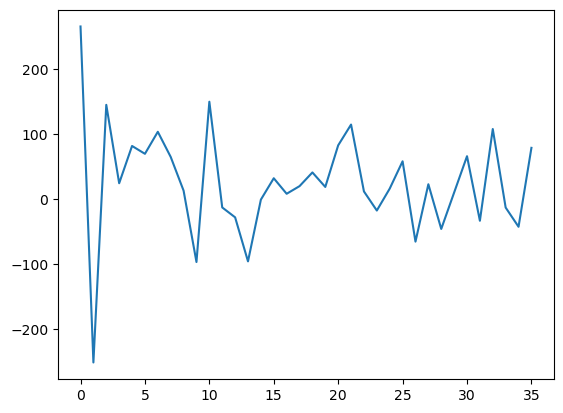

In [922]:
residuals.plot()

In [923]:
# Residuals should be white noise , and should have no pattern , if it has pattern , we should still improve


In [924]:
residuals.describe()

count     36.000000
mean      25.166132
std       86.508246
min     -251.672098
25%      -14.150401
50%       19.384769
75%       72.117998
max      266.000000
dtype: float64

### Variations
* **SARIMAX** - <br />
    model = SARIMAX(df['Sales'], order=(q,d,p)) <br />
* **Autoregression** - <br />
    model = ARIMA(df['Sales'], order=(p,d,0)) <br />
* **Moving Avaerage Model** - <br />
    model = ARIMA(df['Sales'], order=(0,d,q)) <br />

In [925]:
output = model_fit.forecast()

In [929]:
output

36    656.795678
dtype: float64

In [927]:
model_fit.forecast(5)

36    656.795678
37    637.266993
38    712.228566
39    710.393136
40    755.778265
Name: predicted_mean, dtype: float64

In [930]:
#in the first array , we have the forecasted value 
#in the second array, we have the standard deviation 

### Walk Forward ARIMA

In [931]:
df = pd.read_csv('shampoo.csv', header=0, parse_dates=[0])

In [932]:
df.head()

Month  Sales
0  1-01  266.0
1  1-02  145.9
2  1-03  183.1
3  1-04  119.3
4  1-05  180.3

def parser(x):
return datetime.strptime('190'+x, '%Y-%m')

In [933]:
train_size = int(df.shape[0]*0.7)

In [934]:
train, test = df.Sales[0:train_size], df.Sales[train_size:]

In [935]:
test.shape

(11,)

In [940]:
data = train
predict =[]
for t in test:
    model = SARIMAX(data, order=(5,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y)
    predict.append(y)
    data = np.append(data, t)
    data = pd.Series(data)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.32186D+00    |proj g|=  4.40936D-02

At iterate    5    f=  5.32053D+00    |proj g|=  1.30877D-03

At iterate   10    f=  5.31992D+00    |proj g|=  1.35306D-02

At iterate   15    f=  5.31866D+00    |proj g|=  6.76585D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     19     22      1     0     0   2.435D-06   5.319D+00
  F =   5.3186306343095229     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
25    36

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.33174D+00    |proj g|=  3.29991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     20      1     0     0   1.320D-05   5.332D+00
  F =   5.3317177337591426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
28    357.645324
dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.33083D+00    |proj g|=  3.55862D-02

At iterate    5    f=  5.32918D+00    |proj g|=  1.05884D-03

At iterate   10    f=  5.32886D+00   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  5.44795D+00    |proj g|=  1.16927D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     16     20      1     0     0   3.004D-07   5.448D+00
  F =   5.4479520963720613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
32    526.890876
dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49945D+00    |proj g|=  3.64449D-02

At iterate    5    f=  5.49670D+00    |proj g|=  4.05255D-03

At iterate   10    f=  5.49661D+00   

 This problem is unconstrained.
 This problem is unconstrained.


In [941]:
predict

[25    368.668956
 dtype: float64,
 26    335.044741
 dtype: float64,
 27    363.220221
 dtype: float64,
 28    357.645324
 dtype: float64,
 29    443.047835
 dtype: float64,
 30    378.365673
 dtype: float64,
 31    459.415021
 dtype: float64,
 32    526.890876
 dtype: float64,
 33    457.231275
 dtype: float64,
 34    672.914944
 dtype: float64,
 35    531.541449
 dtype: float64]

In [942]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test.values, predict)
mse

9170.052441098296

In [943]:
#Arima models: handle trend in data but unable to handle seasonality in data


## SARIMA or Seasonal ARIMA 

	
SARIMA(p,d,q)(P,D,Q)m

* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

**Seasonal Elements** -   
There are four seasonal elements that are not part of ARIMA that must be configured; they are:  

* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* m: The number of time steps for a single seasonal period.

In [944]:
#Sarima, will remove trend and seasonality , AR model , MA model 

In [696]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [697]:
df = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0 , parse_dates=[0])

In [698]:
df.head()

Month  MilesMM
0 1963-01-01     6827
1 1963-02-01     6178
2 1963-03-01     7084
3 1963-04-01     8162
4 1963-05-01     8462

In [699]:
df.tail()

Month  MilesMM
91 1970-08-01    14057
92 1970-09-01    16234
93 1970-10-01    12389
94 1970-11-01    11595
95 1970-12-01    12772

In [700]:
df.index = df['Month'] 

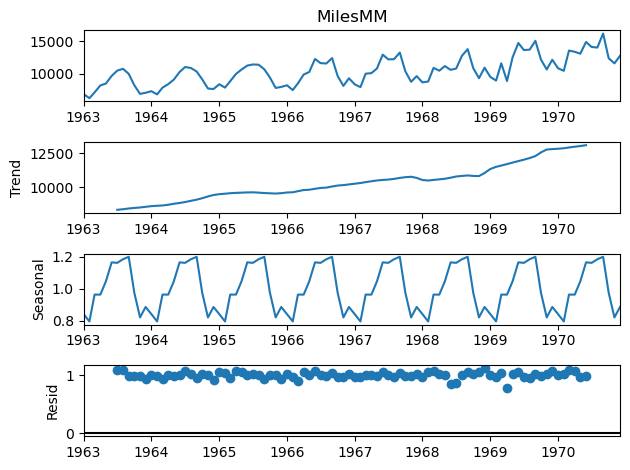

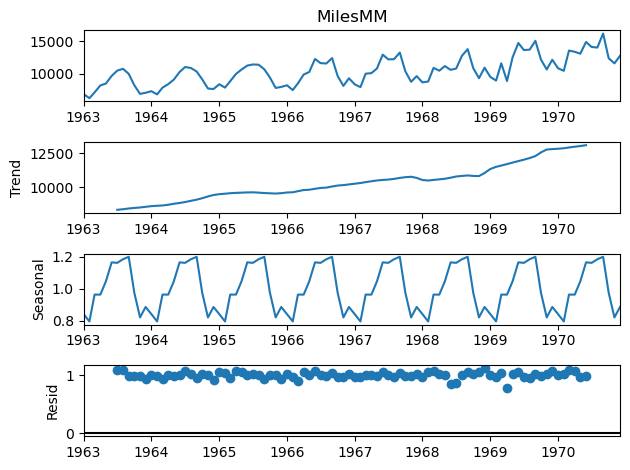

In [701]:
result_a = seasonal_decompose(df['MilesMM'], model='multiplicative')
result_a.plot()

In [946]:
# from trend , d=1 : the differencing we need to detrend the data 
#from seasonal , m=12 since we have mounthly data and yearly seasonality



In [702]:
model = SARIMAX(df['MilesMM'], order=(5,1,3), seasonal_order=(1,1,1,12))

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [703]:
model_fit = model.fit()

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.12535D+00    |proj g|=  3.45078D-01

At iterate    5    f=  6.96597D+00    |proj g|=  5.45169D-02

At iterate   10    f=  6.95862D+00    |proj g|=  1.47073D-02

At iterate   15    f=  6.94414D+00    |proj g|=  5.82852D-02

At iterate   20    f=  6.93432D+00    |proj g|=  1.90296D-02

At iterate   25    f=  6.93391D+00    |proj g|=  1.47464D-03

At iterate   30    f=  6.93390D+00    |proj g|=  1.86626D-03

At iterate   35    f=  6.93388D+00    |proj g|=  3.62177D-03

At iterate   40    f=  6.93386D+00    |proj g|=  1.65987D-03

At iterate   45    f=  6.93379D+00    |proj g|=  2.03984D-03

At iterate   50    f=  6.92972D+00    |proj g|=  3.51158D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/SalmaDkier/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [704]:
residuals = model_fit.resid

<AxesSubplot:xlabel='Month'>

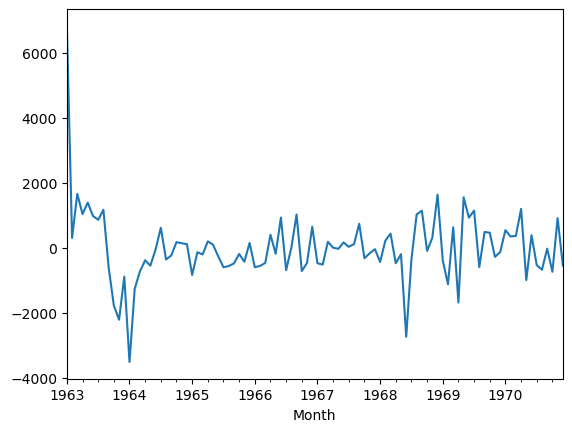

In [705]:
residuals.plot()

In [947]:
#we can see that residuals are centered around 0 and there is no trend or seasonality in the residual


In [706]:
output = model_fit.forecast()

In [707]:
output

1971-01-01    11476.000788
Freq: MS, dtype: float64

In [708]:
model_fit.forecast(12)

1971-01-01    11476.000788
1971-02-01    11153.739113
1971-03-01    13670.158786
1971-04-01    12648.006632
1971-05-01    14338.913895
1971-06-01    15786.366118
1971-07-01    14979.451132
1971-08-01    15362.649708
1971-09-01    16963.089291
1971-10-01    13681.987053
1971-11-01    12426.872790
1971-12-01    13730.460296
Freq: MS, Name: predicted_mean, dtype: float64

In [709]:
yhat = model_fit.predict()

In [710]:
yhat.head()

1963-01-01       0.000000
1963-02-01    5871.800077
1963-03-01    5421.975095
1963-04-01    7122.209703
1963-05-01    7067.882532
Freq: MS, Name: predicted_mean, dtype: float64

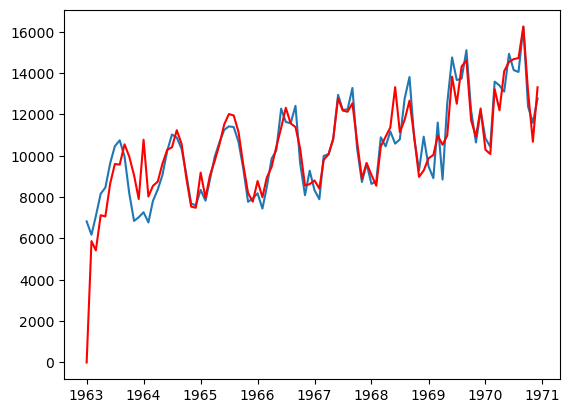

In [711]:
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat, color='red')